<a href="https://colab.research.google.com/github/fajarzulkifli/Portofolio/blob/main/Kondisi_Jalan_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REKOMENDASI PERBAIKAN KONDISI JALAN RUSAK DI INDONESIA**

Nama : Muhammad Fajar Zulkifli

Percepatan perbaikan infrastruktur dan pelayanan masyarakat dalam akses antar provinsi dilakukan analisa data untuk mendapatkan rekomendasi pengelompokan data terkait kondisi jalan rusak di seluruh provinsi di Indonesia. Pengelompokan ini **bertujuan** untuk mempermudah pemetaan, serta perencanaan langkah-langkah perbaikan yang lebih efektif dan terarah pada masa mendatang.

In [ ]:
#Menambahkan Library
import pandas as pd #membuat data
import numpy as np #operasi pada data
import matplotlib.pyplot as plt  #visualisasi data
import seaborn as sns  # visualisasi

## **J.62DMI00.001.1 - Mengumpulkan Data**

mengumpulkan data **kondisi permukaan jalan provinsi tahun 2021-2023** dengan penjelasan variabel sebagai berikut:
Kd_Prov,
Provinsi,
Kondisi_Baik(km),
Baik_%,
Kondisi_Sedang(km),
Sedang_%,
Kondisi_RR(km),
RR_%,
Kondisi_RB(km),
RB_%,
Total_Panjang(km)
data yang dikumpulkan adalah  data legal hasil dari collecting peneliti pada website : https://data.pu.go.id/dataset/kondisi-permukaan-jalan-provinsi

In [ ]:
# Load dataset

file_path = 'Kondisi Permukaan Jalan Provinsi Tahun 2021-2023.csv'
data = pd.read_csv(file_path, sep=';')
data.head()

,Kd_Prov,Tahun,Provinsi,Kondisi_Baik,Baik_%,Kondisi_Sedang,Sedang_%,Kondisi_RR,RR_%,Kondisi_RB,RB_%,Total_Panjang
0,11,2021,Aceh,1317.98,73.97234133,95.93,5.384123207,61.5,3.451720809,306.31,17.19181465,1781.72
1,12,2021,Sumatera Utara,1319.67,43.2891586,1188.19,38.97621781,208.55,6.841069378,332.09,10.89355421,3048.5
2,13,2021,Sumatera Barat,786.12,51.54209284,341.28,22.37608183,210,13.76868607,187.8,12.31313926,1525.2
3,14,2021,Riau,1402.005,50.07500509,324.316,11.58350031,440.746,15.74199678,632.743,22.59949782,2799.81
4,15,2021,Jambi,322.326,31.20761703,460.15,44.55174257,134.426,13.01513104,115.942,11.22550937,1032.844


## **J.62DMI00.010.1 - Menentukan Label Data**

Tujuan : menentukan label/variabel yang akan dilakukan analisis,
label yang akan digunakan analisis yaitu Provinsi,Kondisi jalan rusak ringan(Kondisi_RR), Kondisi jalan rusak berat (Kondisi_RB), dan Panjang Jalan.

In [ ]:
print(data.columns)

Index(['Kd_Prov', 'Tahun', 'Provinsi', 'Kondisi_Baik', 'Baik_%',
       'Kondisi_Sedang', 'Sedang_%', 'Kondisi_RR', 'RR_%', 'Kondisi_RB',
       'RB_%', 'Total_Panjang'],
      dtype='object')


## **J.62DMI00.007.1 - Menentukan Objek Data**

Objek yang akan dianalisis adalah kondisi jalan berdasarkan provinsi dan tahun. Variabel yang relevan termasuk panjang jalan untuk setiap kategori jalan rusak (RR, RB).

In [ ]:
print(data.head())

   Kd_Prov  Tahun        Provinsi Kondisi_Baik       Baik_% Kondisi_Sedang  \
0       11   2021            Aceh      1317.98  73.97234133          95.93   
1       12   2021  Sumatera Utara      1319.67   43.2891586        1188.19   
2       13   2021  Sumatera Barat       786.12  51.54209284         341.28   
3       14   2021            Riau     1402.005  50.07500509        324.316   
4       15   2021           Jambi      322.326  31.20761703         460.15   

      Sedang_% Kondisi_RR         RR_% Kondisi_RB         RB_% Total_Panjang  
0  5.384123207       61.5  3.451720809     306.31  17.19181465       1781.72  
1  38.97621781     208.55  6.841069378     332.09  10.89355421        3048.5  
2  22.37608183        210  13.76868607      187.8  12.31313926        1525.2  
3  11.58350031    440.746  15.74199678    632.743  22.59949782       2799.81  
4  44.55174257    134.426  13.01513104    115.942  11.22550937      1032.844  


## **J.62DMI00.005.1 - Menelaah Data**

Melakukan eksplorasi data untuk memahami informasi yang terkandung pada masing-masing variabel.Mari kita lihat statistik deskriptif untuk memahami distribusi dan variabilitas data.

In [ ]:
print(data.describe())

          Kd_Prov        Tahun
count  106.000000   106.000000
mean    49.311321  2022.037736
std     27.227564     0.827210
min     11.000000  2021.000000
25%     19.500000  2021.000000
50%     52.000000  2022.000000
75%     73.000000  2023.000000
max     96.000000  2023.000000


hanya muncul 2 kolom saja Kd_Prov dan Tahun
terdapat kemungkinan kolom/variabel yang lain belum bernilai integer sehingga tidak terbaca saat dilakukan statistika deskriptif


## **J.62DMI00.006.1 - Memvalidasi Data**

memvalidasi memeriksa apakah ada nilai yang hilang atau tidak konsisten, atau terdapat kesalahan format pada tabel yang dipanggil, serta memeriksa adanya missing value.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Kd_Prov         106 non-null    int64 
 1   Tahun           106 non-null    int64 
 2   Provinsi        106 non-null    object
 3   Kondisi_Baik    106 non-null    object
 4   Baik_%          106 non-null    object
 5   Kondisi_Sedang  106 non-null    object
 6   Sedang_%        106 non-null    object
 7   Kondisi_RR      106 non-null    object
 8   RR_%            106 non-null    object
 9   Kondisi_RB      106 non-null    object
 10  RB_%            106 non-null    object
 11  Total_Panjang   106 non-null    object
dtypes: int64(2), object(10)
memory usage: 10.1+ KB


tidak terdapat missing data pada dataset.
kita lakukan perbaikan jenis kolom yang memiliki tipe data Object.

In [ ]:
# mengubah kolom dari kolom 3 hingga 11 menjadi type integer

for i in range(3, 12):  # mengubah dari kolom 3-12
  column_name = data.columns[i]
  data[column_name] = pd.to_numeric(data[column_name], errors='coerce')
  data[column_name] = data[column_name].fillna(0).astype(int)  # mengisi data kosong dengan 0 dan mengubah menjadi tipe integer
data['Tahun'] = data['Tahun'].astype(str)  # mengubah kolom 'Tahun' menjadi tipe integer
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Kd_Prov         106 non-null    int64 
 1   Tahun           106 non-null    object
 2   Provinsi        106 non-null    object
 3   Kondisi_Baik    106 non-null    int64 
 4   Baik_%          106 non-null    int64 
 5   Kondisi_Sedang  106 non-null    int64 
 6   Sedang_%        106 non-null    int64 
 7   Kondisi_RR      106 non-null    int64 
 8   RR_%            106 non-null    int64 
 9   Kondisi_RB      106 non-null    int64 
 10  RB_%            106 non-null    int64 
 11  Total_Panjang   106 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 10.1+ KB


In [ ]:
data.describe()

,Kd_Prov,Kondisi_Baik,Baik_%,Kondisi_Sedang,Sedang_%,Kondisi_RR,RR_%,Kondisi_RB,RB_%,Total_Panjang
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,49.311321,607.254717,48.584906,244.528302,17.292453,150.386792,12.037736,208.660377,15.537736,970.745283
std,27.227564,456.721110,21.060397,229.864606,13.083590,143.758831,10.757876,211.434371,16.518489,825.912633
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.500000,288.250000,35.000000,75.000000,7.000000,49.000000,4.000000,57.250000,4.000000,44.250000
50%,52.000000,542.000000,48.500000,191.000000,13.000000,126.500000,9.000000,123.000000,11.500000,895.000000
75%,73.000000,836.500000,64.000000,366.500000,25.000000,207.250000,18.750000,332.000000,21.750000,1513.000000
max,96.000000,1852.000000,88.000000,1188.000000,55.000000,829.000000,47.000000,921.000000,85.000000,3048.000000


In [ ]:
# Cek duplikat masing-masing baris
duplicate_rows = data[data.duplicated()]

if not duplicate_rows.empty:
  print("Terdapat data duplikat:")
  print(duplicate_rows)
else:
  print("Tidak terdapat data duplikat.")

Tidak terdapat data duplikat.


**hasil validasi data** : menunjukkan tidak ada data hilang, tipe data juga sudah sesuai, *dan* tidak ada duplikat dalam data karena data relatif sedikit. tidak ada data duplikat pada data ini karena jumlah data relatif kecil, sehingga minimalisir terjadinya salah dalam penginputan data.

## **J.62DMI00.005.1 - Menelaah Data**

dilakukan eksplorasi data lagi setelah dilakukan perbaikan format

###**Cek Outlier dalam Data Menggunakan Boxplot**

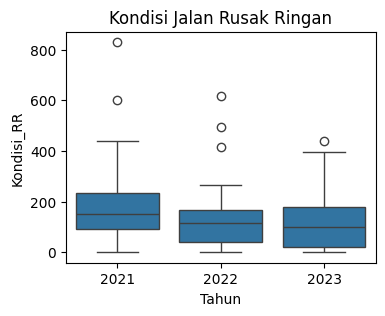

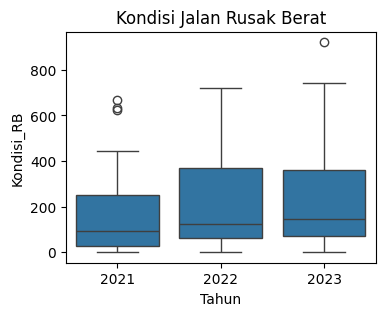

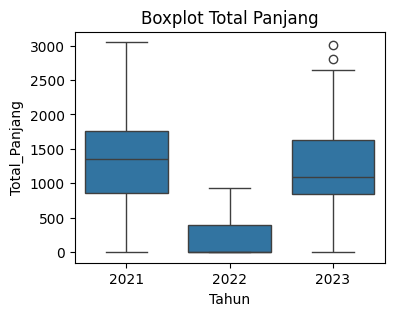

In [ ]:
#cek outlier dalam data pada setiap tahun

plt.figure(figsize=(4, 3))
sns.boxplot(x='Tahun', y='Kondisi_RR', data=data)
plt.title('Kondisi Jalan Rusak Ringan')
plt.xlabel('Tahun')
plt.ylabel('Kondisi_RR')

plt.figure(figsize=(4, 3))
sns.boxplot(x='Tahun', y='Kondisi_RB', data=data)
plt.title('Kondisi Jalan Rusak Berat')
plt.xlabel('Tahun')
plt.ylabel('Kondisi_RB')

plt.figure(figsize=(4, 3))
sns.boxplot(x='Tahun', y='Total_Panjang', data=data)
plt.title('Boxplot Total Panjang')
plt.xlabel('Tahun')
plt.ylabel('Total_Panjang')

plt.show()

terdapat beberapa otulier dalam data, untuk langkah selanjutnya terkait penanganan outlier tidak perlu dilakukan karena model yang akan kita bangun adalah klasifikasi model bukan prediksi model. sehingga kemungkinan pengaruh outlier dalam membangun model adalah terbentuknya klaster sendiri untuk outlier sehingga akan muncul informasi baru terkait kondisi permukaan jalan.
namun jika peneliti ingin mengahapus maka bisa dengan menghitung IQR dan whisker tsb selanjutnya nilai yang diluar Whisker dibuang ataukah diganti dengan rata-rata atau median.

###**Histogram Kondisi Jalan Rusak Ringan dan Rusak Berat**

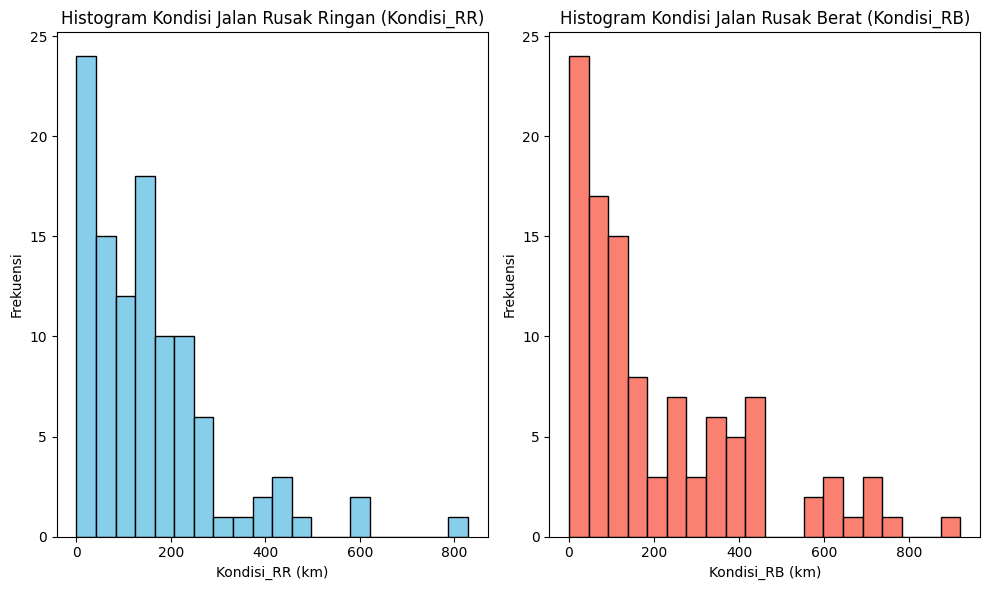

In [ ]:
# Histogram untuk melihat kondisi jalan lebih detail

plt.figure(figsize=(10, 6))

# Histogram Kondisi_RR
plt.subplot(1, 2, 1)
plt.hist(data['Kondisi_RR'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram Kondisi Jalan Rusak Ringan (Kondisi_RR)')
plt.xlabel('Kondisi_RR (km)')
plt.ylabel('Frekuensi')

# Histogram Kondisi_RB
plt.subplot(1, 2, 2)
plt.hist(data['Kondisi_RB'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram Kondisi Jalan Rusak Berat (Kondisi_RB)')
plt.xlabel('Kondisi_RB (km)')
plt.ylabel('Frekuensi')


plt.tight_layout()
plt.show()

## **J.62DMI00.008.1 - Membersihkan Data**

dari hasil validasi data tidak ada data hilang sehingga tidak perlu dilakukan pengisian data hilang.
hasil dari pengecekan outlier dengan Boxplot tidak perlu menangani data outlier karena pendapat dari peneliti. namun jika dilakukan penanganan boxplot bisa mengganti dengan rata-rata.

##**J.62DMI00.009.1 - Mengkonstruksi Data**

melakukan normalisasi data menggunakan nilai Z. standarisasi untuk mengubah data sehingga memiliki rata-rata 0 dan standar deviasi 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

# standarisasi data
numerical_columns = ['Kondisi_RR', 'Kondisi_RB', 'Total_Panjang']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_columns]) #standarisasi numerical columns
print(data_scaled)

[[-0.62473682  0.46256456  0.98570224]
 [ 0.40266678  0.58611834  2.52705054]
 [ 0.41664506 -0.1029316   0.67426959]
 [ 2.02414731  2.0117389   2.22413363]
 [-0.11452959 -0.44508053  0.07451843]
 [-0.4989323  -0.65417155  0.65967118]
 [-0.31022552  0.28673802  0.71928134]
 [ 0.61933013 -0.20272504  0.87864726]
 [-0.80645447 -0.99156841 -0.14689072]
 [ 0.02525321 -0.83475015 -0.09093016]
 [-1.05107438 -0.99156841 -1.18094443]
 [-0.17044271 -0.2835102   1.6900753 ]
 [ 0.62631927 -0.99156841  1.74360278]
 [ 0.03224235 -0.70169223 -0.25637876]
 [-0.42205176 -0.99156841  0.54775007]
 [-1.05107438 -0.99156841 -1.18094443]
 [ 0.03923149 -0.99156841 -0.27705983]
 [-0.47796488 -0.17896469  0.6243917 ]
 [-0.24033411  2.1780613   2.04287009]
 [ 3.1354206  -0.92979152  0.68521839]
 [-0.02367077 -0.91553532  0.36648654]
 [-0.38011692 -0.83475015 -0.25394569]
 [ 0.83599348 -0.68268396 -0.10552857]
 [ 0.81502606 -0.88227084 -0.14567418]
 [-0.51989972 -0.63516327 -0.05443415]
 [ 0.2489057   1.10884588

##**J.62DMI00.013.1 - Membangun Model**

### **1. Menentukan Jumlah Kelompok/klaster dengan Elbow Method**

Grafik elbow menggambarkan hubungan antara jumlah klaster (K) dan Within-Cluster Sum of Squares (WCSS) atau Distorsi. WCSS adalah total jarak kuadrat antara setiap titik data ke centroid klasternya.
tujuan penggunaan grafik elbow untuk menentukan jumlah klaster optimal yang akan dilakukan pengelompokan nantinya.
Sumbu X: Jumlah klaster (K).
Sumbu Y: Nilai WCSS (atau Distorsi).

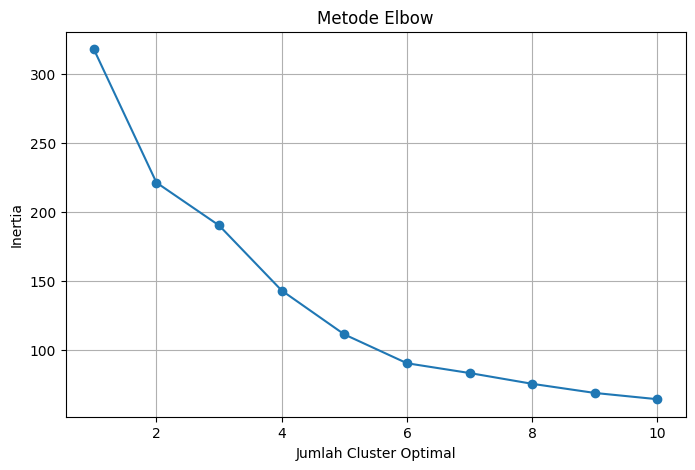

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Metode Elbow untuk menentukan jumlah klaster optimal
inertia = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# plot metode elbow
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, inertia, marker='o')
plt.title('Metode Elbow')
plt.xlabel('Jumlah Cluster Optimal')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

jumlah klaster optimal dapat diidentifikasi pada titik siku grafik, yaitu di mana penurunan nilai Inertia (atau WCSS) mulai melandai.

Pada grafik tersebut:

Penurunan tajam terjadi hingga klaster ke-3.
Setelah itu (klaster ke-4 dan seterusnya), penurunan menjadi lebih landai.
Jumlah klaster optimal adalah 3 dalam grafik tersebut.

###**2. Clustering Menggunakan K-Means**

In [ ]:
# K-Means variabel yang akan dilakukan clustering
optimal_clusters = 3  # menentukan klaster optimal
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans_model.fit_predict(data_scaled) + 1

cluster_stats = data.groupby('Cluster')[numerical_columns].mean()
cluster_stats['Count'] = data['Cluster'].value_counts()

print("Cluster Statistics")  # label cluster statistics
print(cluster_stats)


Cluster Statistics
         Kondisi_RR  Kondisi_RB  Total_Panjang  Count
Cluster                                              
1        111.891892  206.351351     143.810811     37
2        263.952381  463.714286    1871.571429     21
3        130.375000   98.854167    1214.062500     48


analisa untuk mengetahui informasi yang dikandung dalam cluster

**Cluster 1**
*   Kondisi Rusak Ringan (111 km): rendah
*   Kondisi Rusak Berat (206 km): Menengah
*   Panjang Jalan (143 km): pendek

**Cluster 2**
*   Kondisi Rusak Ringan (263 km): tinggi
*   Kondisi Rusak Berat (463 km): tinggi
*   Panjang Jalan (1871 km): terpanjang

**Cluster 3**
*   Kondisi Rusak Ringan (130 km): menengah
*   Kondisi Rusak Berat (98 km) : rendah
*   Panjang Jalan (1214 km): sedang

dari ketiga cluster yang terbentuk , cluster 2 yang harus menjadi prioritas utama perbaikan, cluster 1 menjadi prioritas kedua, dan terakhir cluster 3 menjadi prioritas ketiga dan menjadi evaluasi agar kedepannya jumlah klaster 3 dapat diturunkan agar kondisi jalan tidak menjadi kondisi sesuai klaster 1 dan 2

In [ ]:
# Menampilkan data keseluruhan
data

,Kd_Prov,Tahun,Provinsi,Kondisi_Baik,Baik_%,Kondisi_Sedang,Sedang_%,Kondisi_RR,RR_%,Kondisi_RB,RB_%,Total_Panjang,Cluster
0,11,2021,Aceh,1317,73,95,5,61,3,306,17,1781,3
1,12,2021,Sumatera Utara,1319,43,1188,38,208,6,332,10,3048,2
2,13,2021,Sumatera Barat,786,51,341,22,210,13,187,12,1525,3
3,14,2021,Riau,1402,50,324,11,440,15,632,22,2799,2
4,15,2021,Jambi,322,31,460,44,134,13,115,11,1032,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,92,2023,Papua Barat,470,35,92,6,23,1,740,55,1327,2
102,93,2023,Papua Selatan,106,19,48,8,6,1,385,70,546,1
103,94,2023,Papua Tengah,54,16,17,5,85,26,163,51,321,1
104,95,2023,Papua Pegunungan,62,35,5,3,83,47,25,14,177,1


dari dataset diatas yang sudah dilakukan clustering dengan metode K-Means.




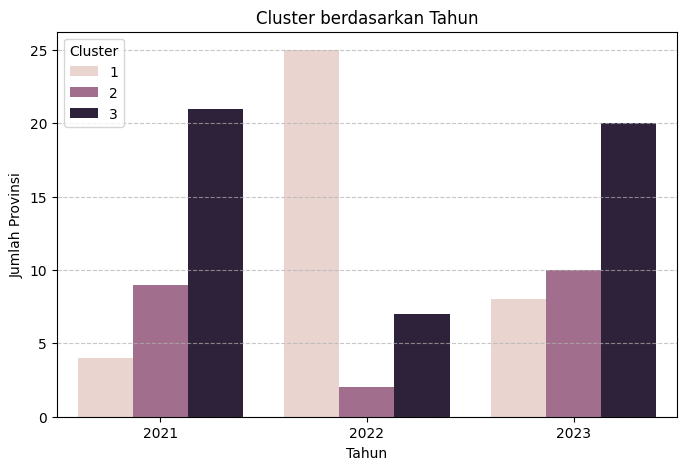

In [ ]:
# visualisasi cluster berdasarkan tahun
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Tahun', hue='Cluster')
plt.title('Cluster berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Provinsi')
plt.legend(title='Cluster')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Interpretasi**
difokuskan untuk penanganan perbaikan pada cluster 2 dan 3, sementara untuk cluster 1 dilakukan pemantauan agar tidak menambah jumlah kesurakan jalan pada beberapa provinsi agar tidak menyebabkan cluster 2 dan 3 naik.

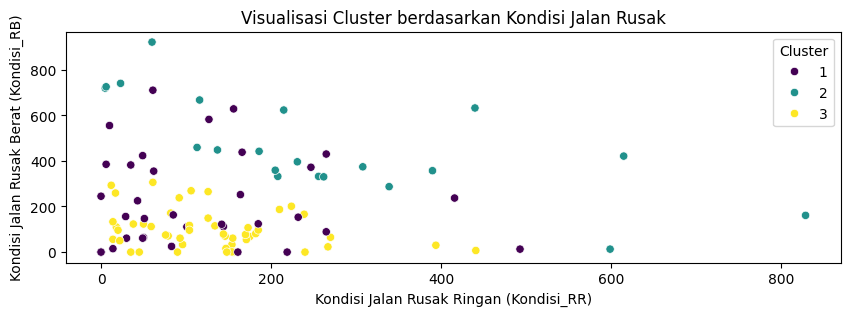

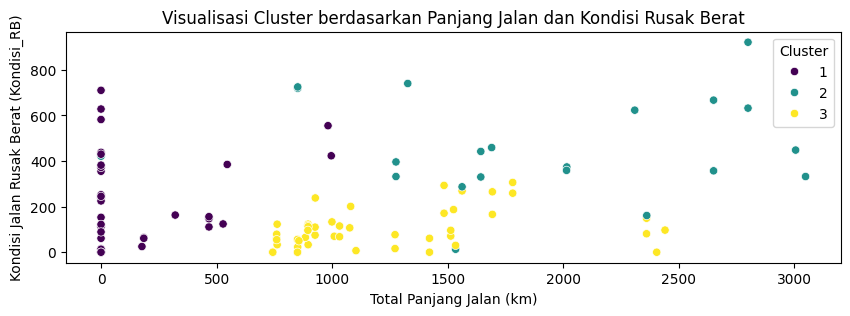

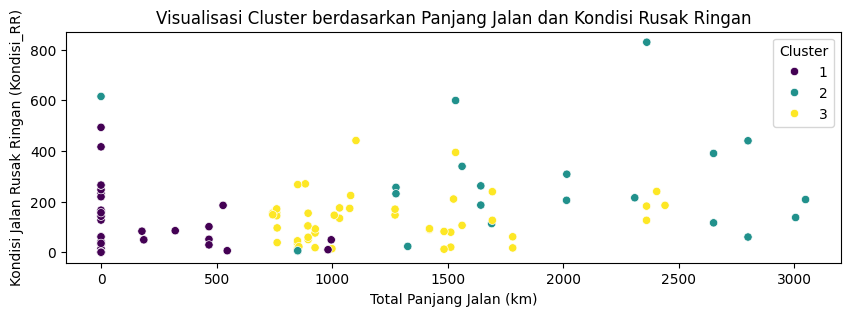

In [ ]:

# Visualisasi cluster berdasarkan Kondisi_RR dan Kondisi_RB
plt.figure(figsize=(10, 3))
sns.scatterplot(x='Kondisi_RR', y='Kondisi_RB', hue='Cluster', data=data, palette='viridis')
plt.title('Visualisasi Cluster berdasarkan Kondisi Jalan Rusak')
plt.xlabel('Kondisi Jalan Rusak Ringan (Kondisi_RR)')
plt.ylabel('Kondisi Jalan Rusak Berat (Kondisi_RB)')
plt.legend(title='Cluster')
plt.show()

# Visualisasi cluster berdasarkan Total_Panjang dan Kondisi_RB
plt.figure(figsize=(10, 3))
sns.scatterplot(x='Total_Panjang', y='Kondisi_RB', hue='Cluster', data=data, palette='viridis')
plt.title('Visualisasi Cluster berdasarkan Panjang Jalan dan Kondisi Rusak Berat')
plt.xlabel('Total Panjang Jalan (km)')
plt.ylabel('Kondisi Jalan Rusak Berat (Kondisi_RB)')
plt.legend(title='Cluster')
plt.show()

# Visualisasi cluster berdasarkan Total_Panjang dan Kondisi_RR
plt.figure(figsize=(10, 3))
sns.scatterplot(x='Total_Panjang', y='Kondisi_RR', hue='Cluster', data=data, palette='viridis')
plt.title('Visualisasi Cluster berdasarkan Panjang Jalan dan Kondisi Rusak Ringan')
plt.xlabel('Total Panjang Jalan (km)')
plt.ylabel('Kondisi Jalan Rusak Ringan (Kondisi_RR)')
plt.legend(title='Cluster')
plt.show()

##**J.62DMI00.014.1 - Mengevaluasi Hasil Pemodelan**


###**Evaluasi Model dengan Devies-Bouldin Index(DBI)**

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Menghitung Davies-Bouldin Index (DBI)
dbi_score = davies_bouldin_score(data_scaled, data['Cluster'])

print(f"Davies-Bouldin Index (DBI): {dbi_score}")


Davies-Bouldin Index (DBI): 1.3631268187162882


Nilai DBI = 1.36 menunjukkan bahwa kualitas klastering cukup baik.
Nilai DBI di bawah 1.5 dianggap dapat diterima untuk penelitian diluar medis/rekayasa.
Klaster cukup terpisah, tetapi mungkin masih ada tumpang tindih antar klaster atau beberapa data yang tidak terlalu rapat di dalam klasternya.

###**Evaluasi Model dengan Score Silhouette**

Silhouette Score: 0.2426583518572155


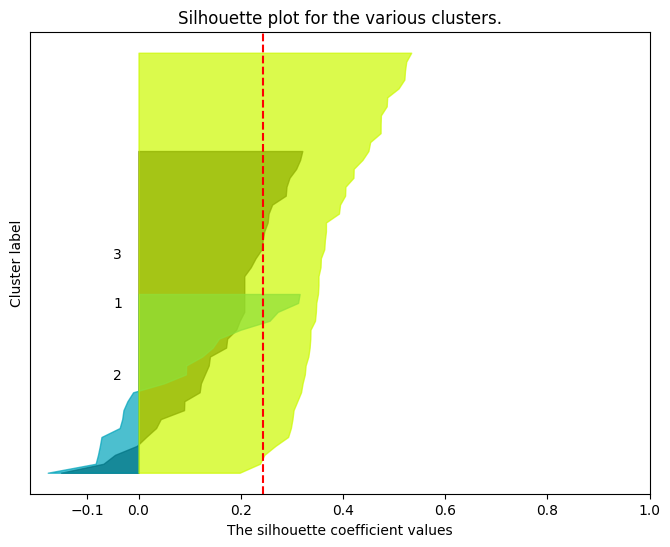

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

# Menghitung skor siluet
silhouette_avg = silhouette_score(data_scaled, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

# Menghitung skor siluet untuk setiap cluster
sample_silhouette_values = silhouette_samples(data_scaled, data['Cluster'])

# Memplot skor siluet
plt.figure(figsize=(8, 6))
for i in range(optimal_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[data['Cluster'] == i+1]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_lower = 0
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / optimal_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10

plt.title("Silhouette plot for the various clusters.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--")

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

Rata-Rata Silhouette Score (Garis merah vertikal):
Nilai rata-rata silhouette score dalam plot berada sekitar 0.2.
Nilai ini menunjukkan bahwa klastering tidak terlalu kuat. Data cenderung tidak terlalu terpisah antara klaster, atau klaster saling tumpang tindih.
Klaster 1 dan Klaster 3 memiliki distribusi yang lebih lebar dan lebih baik dibanding Klaster 2.
Klaster 2 memiliki banyak data dengan nilai silhouette mendekati atau di bawah nol, menunjukkan bahwa beberapa titik di klaster ini mungkin salah klastering atau dekat dengan klaster lain.
